# Practical task sheet 01 -- color space conversion, subsampling, chroma keying and noise

The first practical task sheet will be about color conversion and chroma keying.
For this please checkout the following links:

* https://en.wikipedia.org/wiki/Color_space
* https://en.wikipedia.org/wiki/YCbCr
* https://en.wikipedia.org/wiki/Chroma_subsampling
* https://en.wikipedia.org/wiki/Chroma_key
* https://en.wikipedia.org/wiki/Image_noise

Transmission standards use different color spaces, due to the different end devices, however, cameras also use different color spaces to record videos, it is thus required to convert from one color space to a different one.
We will tackle in this task sheet several parts of color space conversion and subsampling.

Afterward, we will have a look at traditional chroma-keying, a technique used in e.g. television studios.
The key idea of chroma keying is to replace the background with something else, e.g. a weather map or similar.

Finally, we will check out how to reduce salt and pepper noise removal and edge detection for an image.

**General Hint**: in each code cell the parts where code needs to be added are marked with TBD, prefer simple code than complicated.

In [29]:
# version 2.0

In [30]:
# install requirements (this cell should not produce any errors, otherwise check dependencies and guide)
!pip install --user numpy pandas matplotlib scipy jupyter scikit-image scikit-learn scikit-video

In [31]:
# helper functions and required imports

import skimage.io
import numpy as np

def show_image(img):
    """ shows an image (3d array) in a jupytor cell"""
    skimage.io.imshow(img)
    skimage.io.show()

    

## Subtask 1: Color space conversion
The most commonly used color space for video processing is $YC_bC_r$, in the following cells we will manually implement such a conversion from digital RGB values.

Important to know is that the conversion of $[0,1]$-scaled RGB to $YC_bC_r$ is done using the following equations (ITU-R BT.601 conversion):

$$ Y = 16 + ( 65.481 \cdot R + 128.553 \cdot G + 24.966 \cdot B) $$
$$ C_b = 128 + (-37.797 \cdot R - 74.203 \cdot G + 112.0 \cdot B) $$
$$ C_r = 128 + (112.0  \cdot R - 93.786 \cdot G - 18.214 \cdot B) $$

After conversion the components are handled as 8-bit unsigned integer planes.

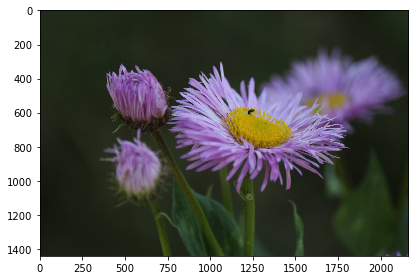

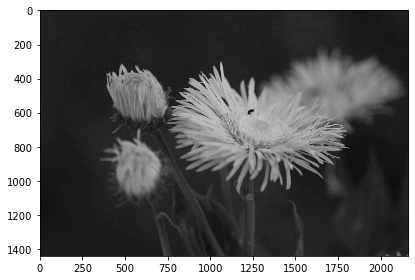

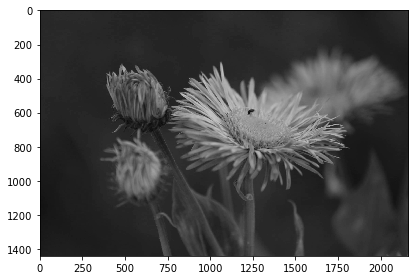

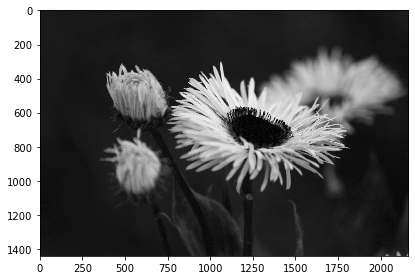

In [32]:
# use method from skimage.io to read "color_example.jpg"
example_image = skimage.io.imread("color_example.jpg") # TBD

show_image(example_image)

# access each color channel, and convert to [0,1] scaled values
R =  example_image[:,:,0]/255 # TBD
G =  example_image[:,:,1]/255  # TBD
B =  example_image[:,:,2]/255   # TBD

# show all channels
show_image(R)
show_image(G)
show_image(B)

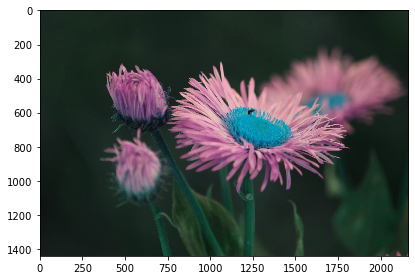

In [33]:
# just as a fun step, we create a new image (with same dimensions), and swap the channels to BGR
#   important if you use the R,G,B values from the previous cell, rescale to [0,255] values

channel_swap = np.zeros(example_image.shape, dtype=np.uint8)

channel_swap[:,:,0] = B*255 # TBD
channel_swap[:,:,1] = G*255 # TBD
channel_swap[:,:,2] = R*255 # TBD

# and we show the channel swapped image
show_image(channel_swap)

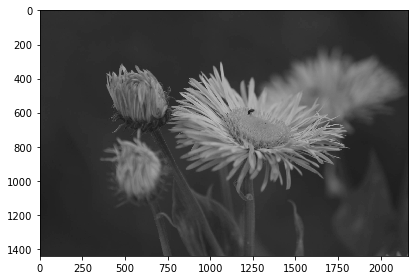

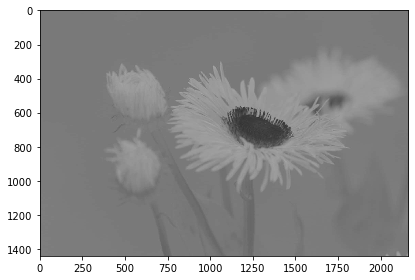

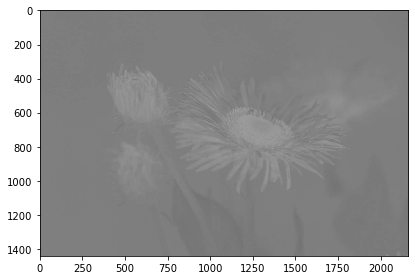

In [34]:
# lets now convert the R,G,B image to Y, C_b, C_r

Y =  16+(65.481*R + 128.553*G + 24.966*B)  # TBD
C_b = 128+(-37.797*R - 74.203*G + 112.0*B)  # TBD
C_r = 128+(112.0*R - 93.786*G - 18.214*B) # TBD

# important convert type to uint8 

Y =  np.uint8(Y) # TBD
C_b = np.uint8(C_b)# TBD
C_r = np.uint8(C_r)  # TBD

show_image(Y)
show_image(C_b)
show_image(C_r)

In [35]:
# put the steps before for RGB to Y C_b C_r conversion into one method
def rgb_to_y_cb_cr(img_rgb): # TBD
    """ method to convert a given RGB image to YC_bC_r according to the steps before,
    """
    # TBD start
    R = np.array(img_rgb[:,:,0])
    G = np.array(img_rgb[:,:,1])
    B = np.array(img_rgb[:,:,2])
    
    Y =  16+(65.481*R + 128.553*G + 24.966*B)  
    C_b = 128+(-37.797*R - 74.203*G + 112.0*B)  
    C_r = 128+(112.0*R - 93.786*G - 18.214*B) 

    # TBD end
    combined = np.zeros(img_rgb.shape, dtype=np.uint8)
    combined[:,:,0] = Y
    combined[:,:,1] = C_b
    combined[:,:,2] = C_r
    return combined

converted = rgb_to_y_cb_cr(example_image)

# save the result
skimage.io.imsave("ycbcr.png", converted)

## Subtask 2: 4:2:0 chroma subsampling
After we are now able to convert RGB images to $YC_bC_r$, we can now implement chroma subsampling.
The general idea here is that human perception is more sensitive to changes in luma than in color.
We will handly 4:2:0 subsampling in this task, this results in the full resolution for Y and only half of the resolution (thus each second pixel) for each C component in the $YC_bC_r$ color space.



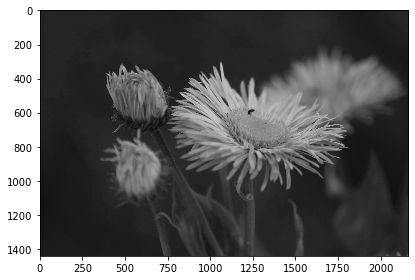

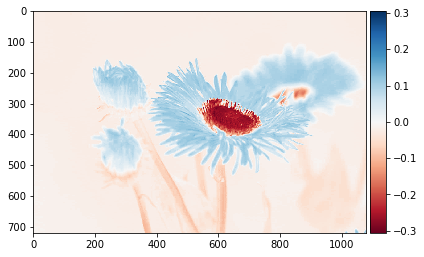

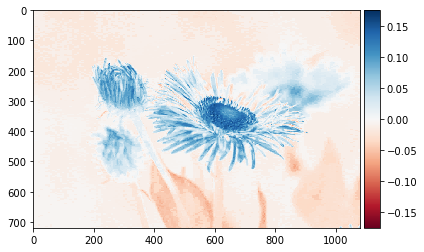

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.3056125128627451, 0.15968133674509802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.0769979243137255, 0.1750988044705882]. Convert image to uint8 prior to saving to suppress this warning.


In [36]:
# convert example_image to  $YC_bC_r$ using skimage.color.rgb2yuv and perform 4:2:0 chroma subsampling
# note: skimage.color.rgb2yuv is not the same as rgb_to_y_cb_cr, we assume here rgb2yuv \approx ycbcr for demonstration

# use method from skimage.io to read "color_example.jpg"
example_image = skimage.io.imread("color_example.jpg")  # TBD

# convert example image to yuv space, we use this as ycbcr 
ycbcr = skimage.color.rgb2yuv(example_image)   

# select separate components
Y = ycbcr[:,:,0] # TBD
C_b = ycbcr[:,:,1]
C_r = ycbcr[:,:,2]

# sub sample Cb, Cr components, according to 4:2:0 method:
C_b_s = C_b [::2 ,::2]   # TBD
C_r_s = C_r[::2 , ::2]   # TBD

# show each component

show_image(Y)
show_image(C_b_s)
show_image(C_r_s)

# save each component
skimage.io.imsave("Y.png", Y)
skimage.io.imsave("C_b_2.png", C_b_s)
skimage.io.imsave("C_r_0.png", C_r_s)

assert((np.array(C_b_s.shape[0:2]) * 2 == example_image.shape[0:2]).all())
assert((np.array(C_r_s.shape[0:2]) * 2 == example_image.shape[0:2]).all())

In [37]:
# put everything together in one method
def chroma_subsampling_4_2_0(img_rgb):
    """ returns each component with applied 4:2:0 sampling"""
    # TBD start
    ycbcr = skimage.color.rgb2yuv(img_rgb)  
    
#     Selecting seperate components
    Y = ycbcr[:,:,0] 
    C_b = ycbcr[:,:,1]
    C_r = ycbcr[:,:,2]
    
    # sub sample Cb, Cr components, according to 4:2:0 method:
    C_b_s = C_b [::2 ,::2]   
    C_r_s = C_r[::2 , ::2]   

    # TBD end
    return np.array([Y, C_b_s, C_r_s], dtype=object)

res_sub_sampling = chroma_subsampling_4_2_0(example_image)

## Subtask 3: Chroma Keying
Assuming you have a well-illuminated scene, with a static colored background (usually blue or green background colors are used). 
The idea is to use a setup consisting of a camera (where parameters like FOV/focal length, camera position are captured), a blue/green box, lights, and some animated/replacement for the background.
Using such a recorded scene will end up, e.g., the following example image, background, and combined version.
(it should be mentioned that the image here is just an example and was processed before to make this task feasible)

<img src="chroma_foreground.jpg" alt="chroma_foreground" style="width: 25%;float: left;"/>
<img src="chroma_background.jpg" alt="chroma_background" style="width: 25%;float: left;"/> 
<img src="chroma_combined.jpg" alt="chroma_combined" style="width: 25%;float: left;"/>

<div style=" clear: both;"></div>

We will handle this task automatically using python, here we assume a static scene, moreover, in a real setup there are more things to be considered (camera position, changing background, ...)


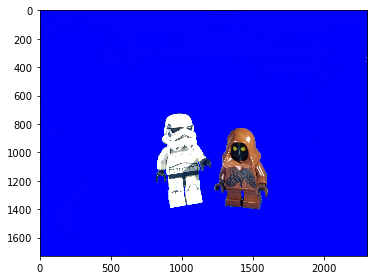

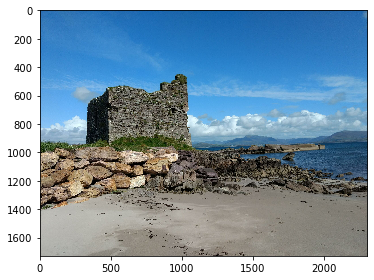

In [38]:
# Hint: read the foreground and background images
# with scikit-image skimage.io function 
# (check for the suitable way)

# read the foreground image
foreground = skimage.io.imread("chroma_foreground.jpg")   # TBD
# show foreground image
show_image(foreground)

# read background in a similar manner and show it
background = skimage.io.imread("chroma_background.jpg")   # TBD
# show background image
show_image(background) 

# check if both images have same shape
assert(foreground.shape == background.shape)

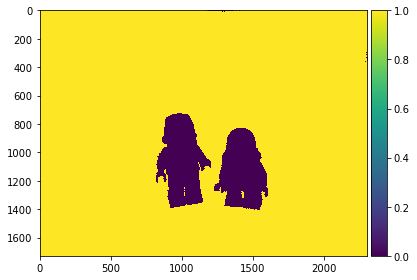

In [39]:
# defined lower blue threshold
lower_threshold = np.array([0, 0, 100])    # [R, G, B] values

# defined upper blue threshold
upper_threshold = np.array([10, 10, 255])  # TBD

 
def threshold_mask(image, lower_threshold, upper_threshold):
    # for each color channel create a mask based on the defined thresholds
    r_mask = ((image[:,:, 0] >= lower_threshold[0]) & (image[:,:, 0] <= upper_threshold[0]))
    g_mask = ((image[:,:, 1] >= lower_threshold[1]) & (image[:,:, 1] <= upper_threshold[1]))  # TBD
    b_mask = ((image[:,:, 2] >= lower_threshold[2]) & (image[:,:, 2] <= upper_threshold[2]))  # TBD
    # combine the channel masks
    mask_value = r_mask & g_mask & b_mask
    return mask_value.copy().astype('uint8')

# create a mask based on a lower and upper threshold
foreground_mask = threshold_mask(foreground, lower_threshold, upper_threshold)

# show the final foreground mask
show_image(foreground_mask)

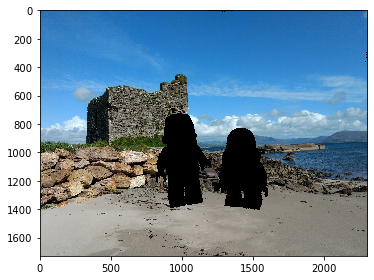

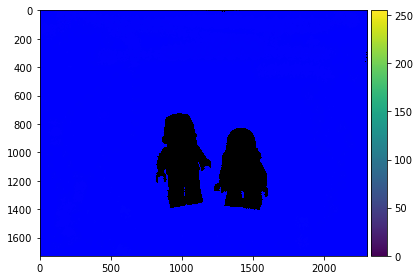

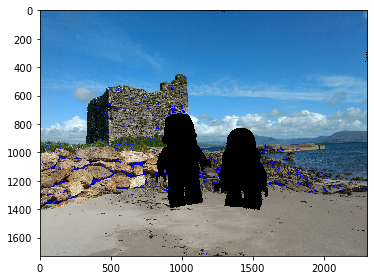

In [40]:
# combine foreground with mask and add background
bg = background.copy()  # copy background image

# for background set the not masked values zero 
bg[foreground_mask != True] = [0, 0, 0]

# copy foreground
fg =  foreground.copy() # TBB
# for the forground set the masked values to zero
fg[foreground_mask != True] = [0, 0 ,0]  #TBO

# show both masked images
show_image(bg)
show_image(fg)

# combine fg and bg image
combined_image = fg + bg  # TBD
show_image(combined_image)

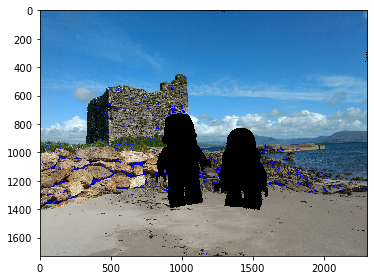

In [ ]:
# put everything in one method
""" one method without showing any image, to perform the above implemented steps in one go, 
        * use threshold_mask that was defined before
    """

def threshold_chroma(foreground, background, lower_threshold, upper_threshold): 
   # defined lower blue threshold
    lower_threshold = np.array([0, 0, 100])    # [R, G, B] values

    # defined upper blue threshold
    upper_threshold = np.array([10, 10, 255])  

#  for each color channel create a mask based on the defined thresholds
    r_mask = ((foreground[:,:, 0] >= lower_threshold[0]) & (foreground[:,:, 0] <= upper_threshold[0]))
    g_mask = ((foreground[:,:, 1] >= lower_threshold[1]) & (foreground[:,:, 1] <= upper_threshold[1]))  # TBD
    b_mask = ((foreground[:,:, 2] >= lower_threshold[2]) & (foreground[:,:, 2] <= upper_threshold[2]))  # TBD
    # combine the channel masks
    mask_value = r_mask & g_mask & b_mask
#     return mask_value.copy().astype('uint8')
    
    # TBD start
    # combine foreground with mask and add background
    bg = background.copy()  # copy background image

    # for background set the not masked values zero 
    bg[foreground_mask != True] = [0, 0, 0]

    # copy foreground
    fg =  foreground.copy() 
    # for the forground set the masked values to zero
    fg[foreground_mask != True] = [0, 0 ,0]  


    # combine fg and bg image
    combined_image = fg + bg  
    # show_image(combined_image)
    # TBD end
    return combined_image

chroma_res_img = threshold_chroma(foreground, background, lower_threshold, upper_threshold)
show_image(chroma_res_img)

# save resulting combined image
skimage.io.imsave("chroma_result.jpg", chroma_res_img)

## Subtask 4: Salt and pepper noise
This type of noise is also known as impulse noise, here some white or black pixels occur randomly in an image, removing them will help to improve the image quality, and also for later post-processing the noise is usually not required.
They usually originate from dead pixels inside the camera, thus they can also occur in all three channels (colored salt and pepper noise).


In [ ]:
# read the noise_example.jpg

example = skimage.io.imread("noise_example.jpg") # TBD
show_image(example)
# because this image does not have noise, we will include now some noise

def add_salt_pepper_noise(img, SNR):
    img_with_noise = img.copy()
    mask = np.random.choice((0, 1, 2), size=img.shape, p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    img_with_noise[mask == 1] = 255 # salt noise
    img_with_noise[mask == 2] = 0 # pepper

    return img_with_noise

noise_example = add_salt_pepper_noise(example, 0.8)

show_image(noise_example)

In [ ]:
# before we do the median filtering using a 2D convolution, 
#   we develop a method to perform 2D convolutions

def convolve_2d(image, kernel_size=(3,3)):
    """ yields (view, i, j) of a 2D convolution of 
            the 2D input image 
    
        for simplicity the borders are ignored
    """
    h, w = image.shape[0:2]  # it should work for gray input images, as well as for colored 
    for i in range(0, 3 ): # TBD
        for j in range(0, 3): # TBD
            # view is the current "kernel" wide view of the image in the convolution
            view = i, j    # TBD
            
            # yield is similar to "return", however a local state of this iteration is stored
            # thus multiple times calling this method will produce each steps of the loops inside 
            # see https://www.geeksforgeeks.org/use-yield-keyword-instead-return-keyword-python/
            yield view, i, j

res = list(convolve_2d(
        np.array([
            [11,12,13,14],
            [21,22,23,24],
            [31,32,33,34],
            [41,42,43,44]
        ]),
        kernel_size = (3,3)
    )
)

# assert(len(res) == 4)
# assert([x[0].sum() for x in res] == [198, 207, 288, 297])
# assert((res[0][0] == [[11, 12, 13], [21, 22, 23], [31, 32, 33]]).all())
# assert((res[1][0] == [[12, 13, 14], [22, 23, 24], [32, 33, 34]]).all())
# assert((res[2][0] == [[21, 22, 23], [31, 32, 33], [41, 42, 43]]).all())
# assert((res[3][0] == [[22, 23, 24], [32, 33, 34], [42, 43, 44]]).all())

In [ ]:
# the next step is to remove the introduced salt and pepper noise,
# a convolution with a median filter for each color component is one possible approach
# here an own implementation is required

def remove_salt_pepper_noise(img_rgb, kernel=(3,3)):
    """ remove colored salt and pepper noise using a convolutional kernel with a default size of 3x3 and 
        median filtering per channel,
        
        use the convolve_2d method inside, 
        for simplicity the borders are ignored
    """
    cleaned_img = img_rgb.copy()
    # TBD start
    red = remove_salt_pepper_noise(img_rgb[:,:,0], kernel, 'valid')
    green = remove_salt_pepper_noise(img_rgb[:,:,1], kernel, 'valid')
    blue = remove_salt_pepper_noise(img_rgb[:,:,2], kernel, 'valid')
#     return np.stack([red, green, blue], axis=2)
    # TBD end
    return cleaned_img([red, green, blue], axis=2)

show_image(remove_salt_pepper_noise(noise_example))

In [ ]:
# to detect edges we now perform a 2D convolution with a laplace filter kernel

def edge_detection_laplace(img_rgb):
    """ detect edgeds using a laplace filter,
        here a 2D convolution is performed with a laplace filter kernel
        
        only the luminance channel of the input image is used,
        use the convolve_2d method inside, 
        for simplicity borders are ignored
    """
    kernel = np.array([
        [1,-1,0],  # TBD
        [-1,4,-1],  # TBD
        [0,-1,0]   # TBD
    ]
    )
    # we only apply the laplace filter to the Y channel
    Y = skimage.color.rgb2yuv(img_rgb)[:,:,0]
    laplacian_edges = np.zeros(Y.shape)
    # TBD start
    
    # TBD end
    return laplacian_edges

# we use the same example image as before, and 
#    detect edges using the laplace filter kernel
show_image(edge_detection_laplace(example))